In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import matplotlib.dates as mdates 

In [27]:
custom_date_parser = lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M') 
gen=pd.read_csv('Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)

gen.head(5)

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_10636\3347709089.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  gen=pd.read_csv('Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68778 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLANT_ID     68778 non-null  int64  
 1   SOURCE_KEY   68778 non-null  object 
 2   DC_POWER     68778 non-null  float64
 3   AC_POWER     68778 non-null  float64
 4   DAILY_YIELD  68778 non-null  float64
 5   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3182 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AMBIENT_TEMPERATURE  3182 non-null   float64
 1   MODULE_TEMPERATURE   3182 non-null   float64
 2   IRRADIATION          3182 non-null   float64
dtypes: float64(3)
memory usage: 99.4 KB


C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_10636\2258066037.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sen=pd.read_csv('Plant_1_Weather_Sensor_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)


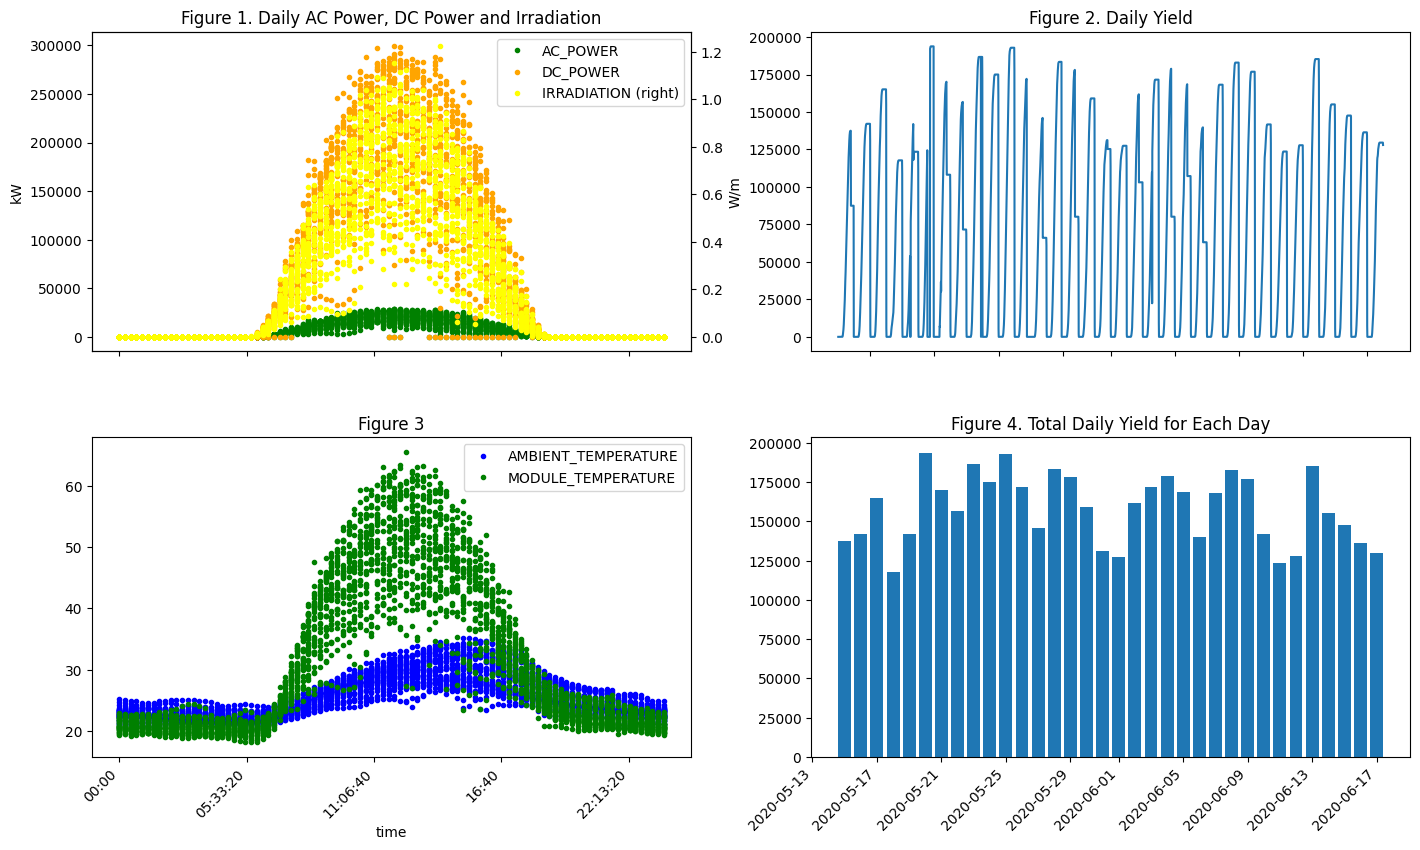

In [30]:
gen.info(), gen.isnull().sum()
gen.groupby('DATE_TIME').count().head(10)
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
sen=pd.read_csv('Plant_1_Weather_Sensor_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)
sen.drop(['PLANT_ID','SOURCE_KEY'],axis=1, inplace=True)
sen.head()
sen.info(), sen.isnull().sum()
gen1= gen.resample('15min').sum() 
gen1['time']=gen1.index.time
sen['time']=sen.index.time

f,ax=plt.subplots(2,2, figsize=(15,10))
plt.tight_layout(pad=5)

gen1.plot(x='time',y='AC_POWER', style='.',color='green',ax=ax[0,0])
gen1.plot(x='time',y='DC_POWER', style='.',color='orange', ax=ax[0,0])
sen.plot(x='time',y='IRRADIATION', style='.',color='yellow', ax=ax[0,0],secondary_y=True)

ax[1,1].bar(x=gen1.index.date, height=gen1.DAILY_YIELD)
ax[0,1].plot(gen1.DAILY_YIELD)
sen.plot(x='time',y='AMBIENT_TEMPERATURE', style='.',color='blue', ax=ax[1,0])
sen.plot(x='time',y='MODULE_TEMPERATURE', style='.',color='green', ax=ax[1,0])

ax[0,0].set_title('Figure 1. Daily AC Power, DC Power and Irradiation')
ax[0,1].set_title('Figure 2. Daily Yield')
ax[1,0].set_title('Figure 3')
ax[1,1].set_title('Figure 4. Total Daily Yield for Each Day')

ax[0,0].set_ylabel('kW')
ax[0,0].right_ax.set_ylabel('W/m')
f.subplots_adjust(wspace=0.2)

f.autofmt_xdate(rotation=45)

Text(0.5, 1.0, 'Figure 5. Inverters AC Power Generation Druing the Day')

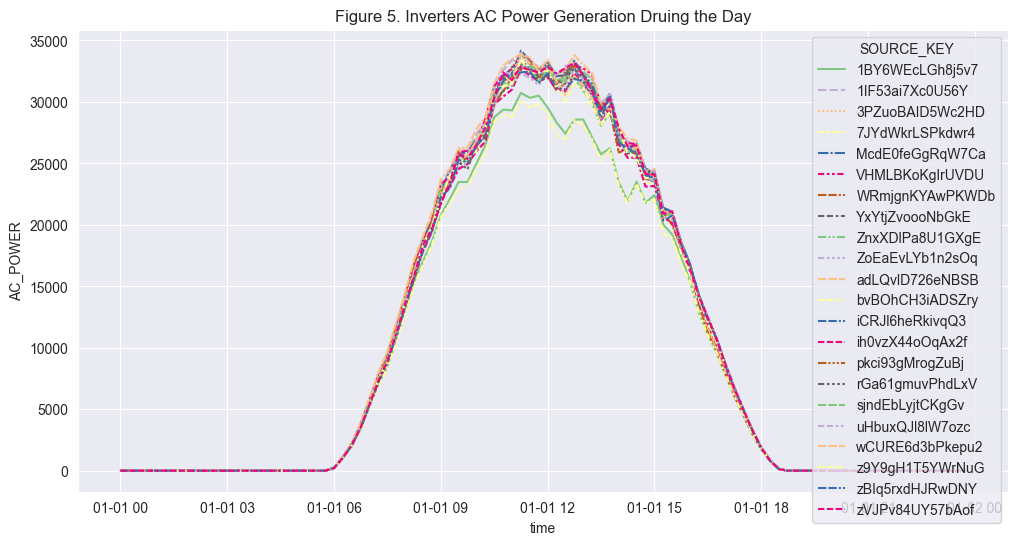

In [31]:
gen['time'] = pd.to_datetime(gen.index.time, format='%H:%M:%S')
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.lineplot(gen.groupby(['time','SOURCE_KEY']).AC_POWER.sum().reset_index(),
             x='time',
             y='AC_POWER',
             hue='SOURCE_KEY',
             style='SOURCE_KEY',
             palette='Accent')
plt.title('Figure 5. Inverters AC Power Generation Druing the Day')

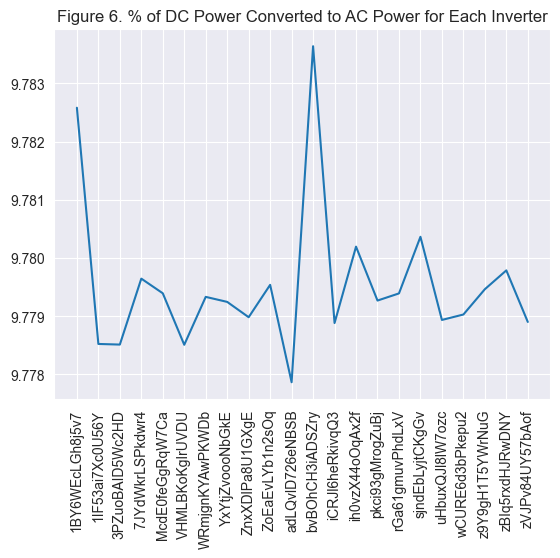

In [32]:
df=(gen.groupby('SOURCE_KEY').AC_POWER.sum()/gen.groupby('SOURCE_KEY').DC_POWER.sum())*100
plt.plot(df)
plt.xticks(df.index,rotation=90)
plt.title('Figure 6. % of DC Power Converted to AC Power for Each Inverter')
plt.show()

<Axes: xlabel='DATE_TIME', ylabel='DC_POWER'>

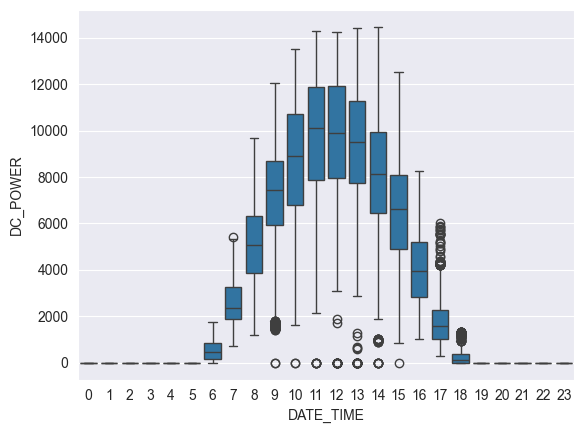

In [33]:
sns.boxplot(x=gen.index.hour, y=gen.DC_POWER)

In [34]:
gen.drop('time', axis=1, inplace=True)
sen.drop('time', axis=1, inplace=True)
gen_sen=gen.join(sen,how='left')
gen_sen.reset_index(inplace=True)

In [37]:
plt.figure(figsize=(4,4))
sns.heatmap(gen_sen.drop('PLANT_ID',axis=1).corr().round(1),cmap='GnBu',annot=True)

ValueError: could not convert string to float: '1BY6WEcLGh8j5v7'

<Figure size 400x400 with 0 Axes>

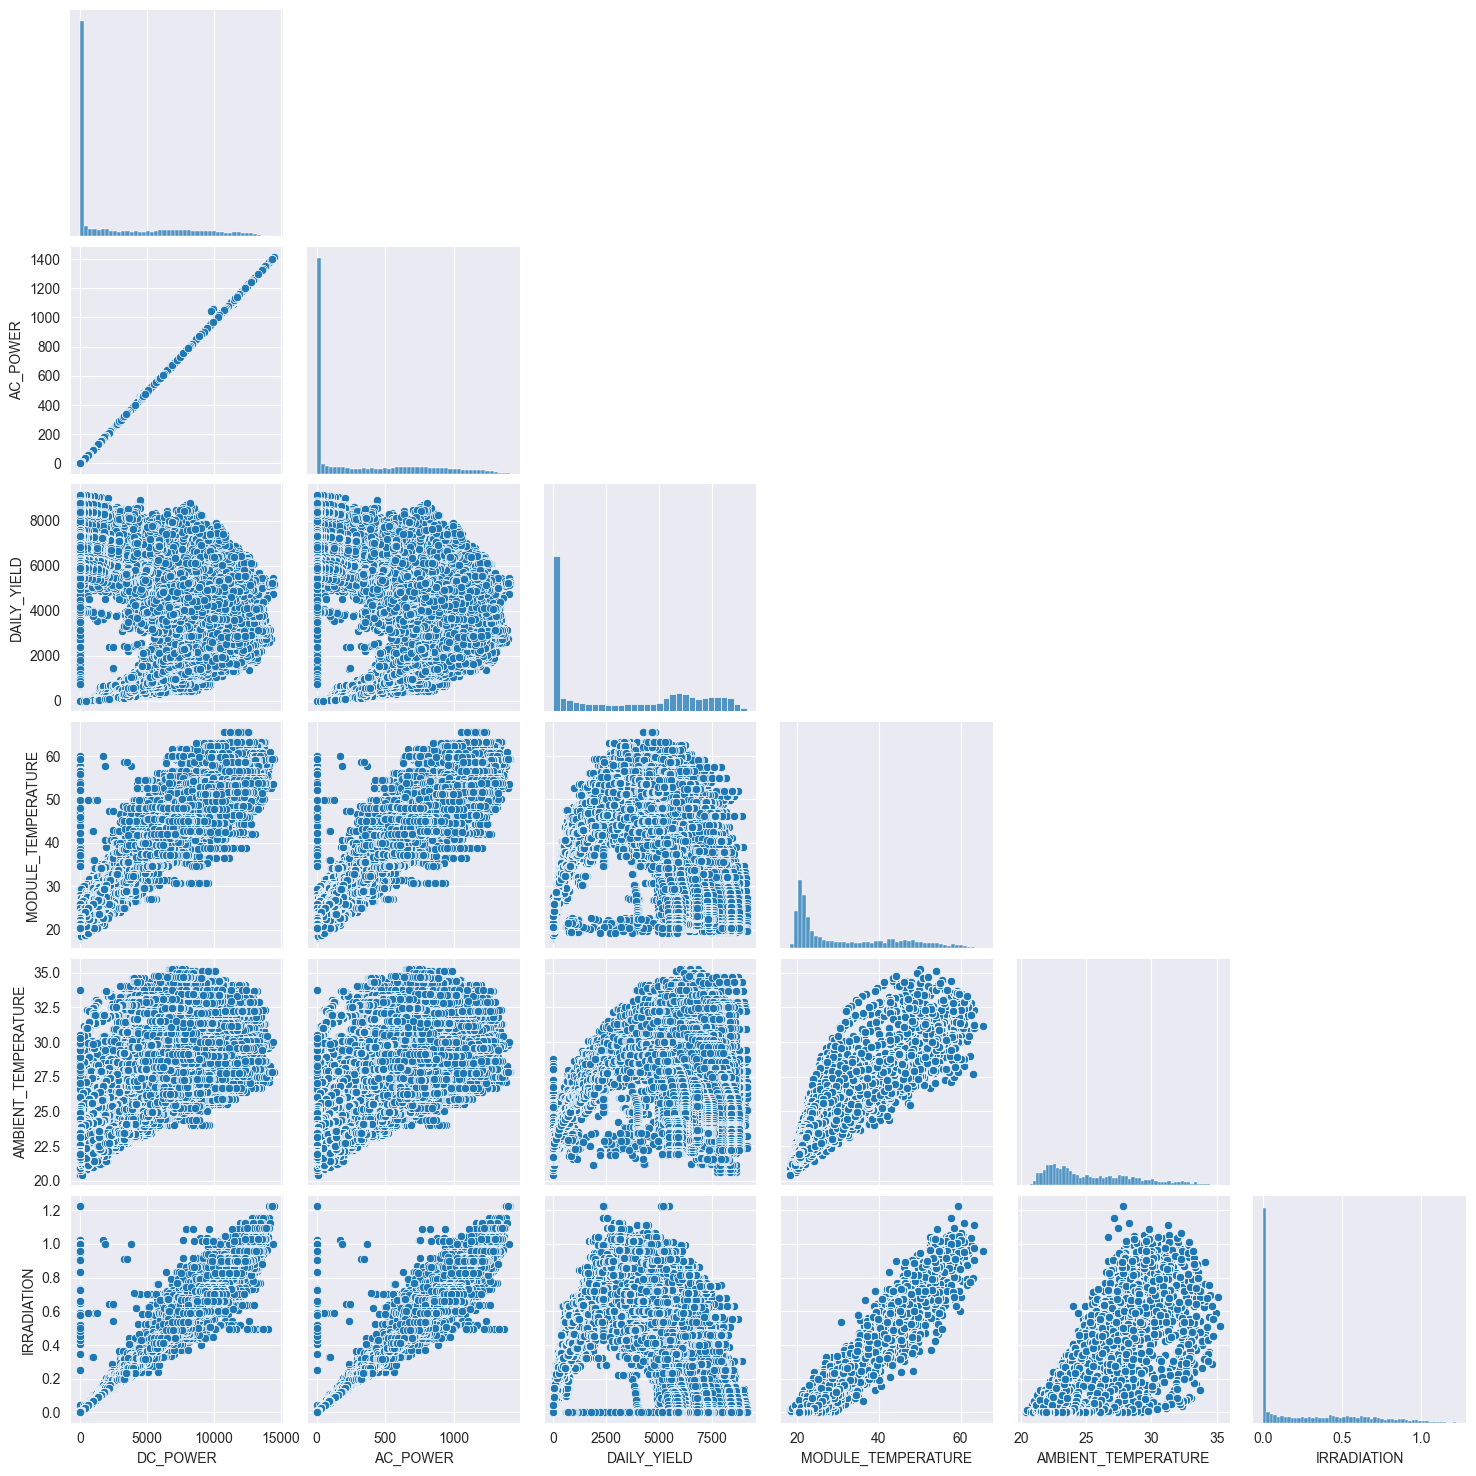

In [38]:
sns.pairplot(gen_sen[['DC_POWER', 'AC_POWER','DAILY_YIELD', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'IRRADIATION']], corner=True)

In [39]:
gen_sen['time']= gen_sen.DATE_TIME.dt.hour
gen_sen['Day']= gen_sen.DATE_TIME.dt.date

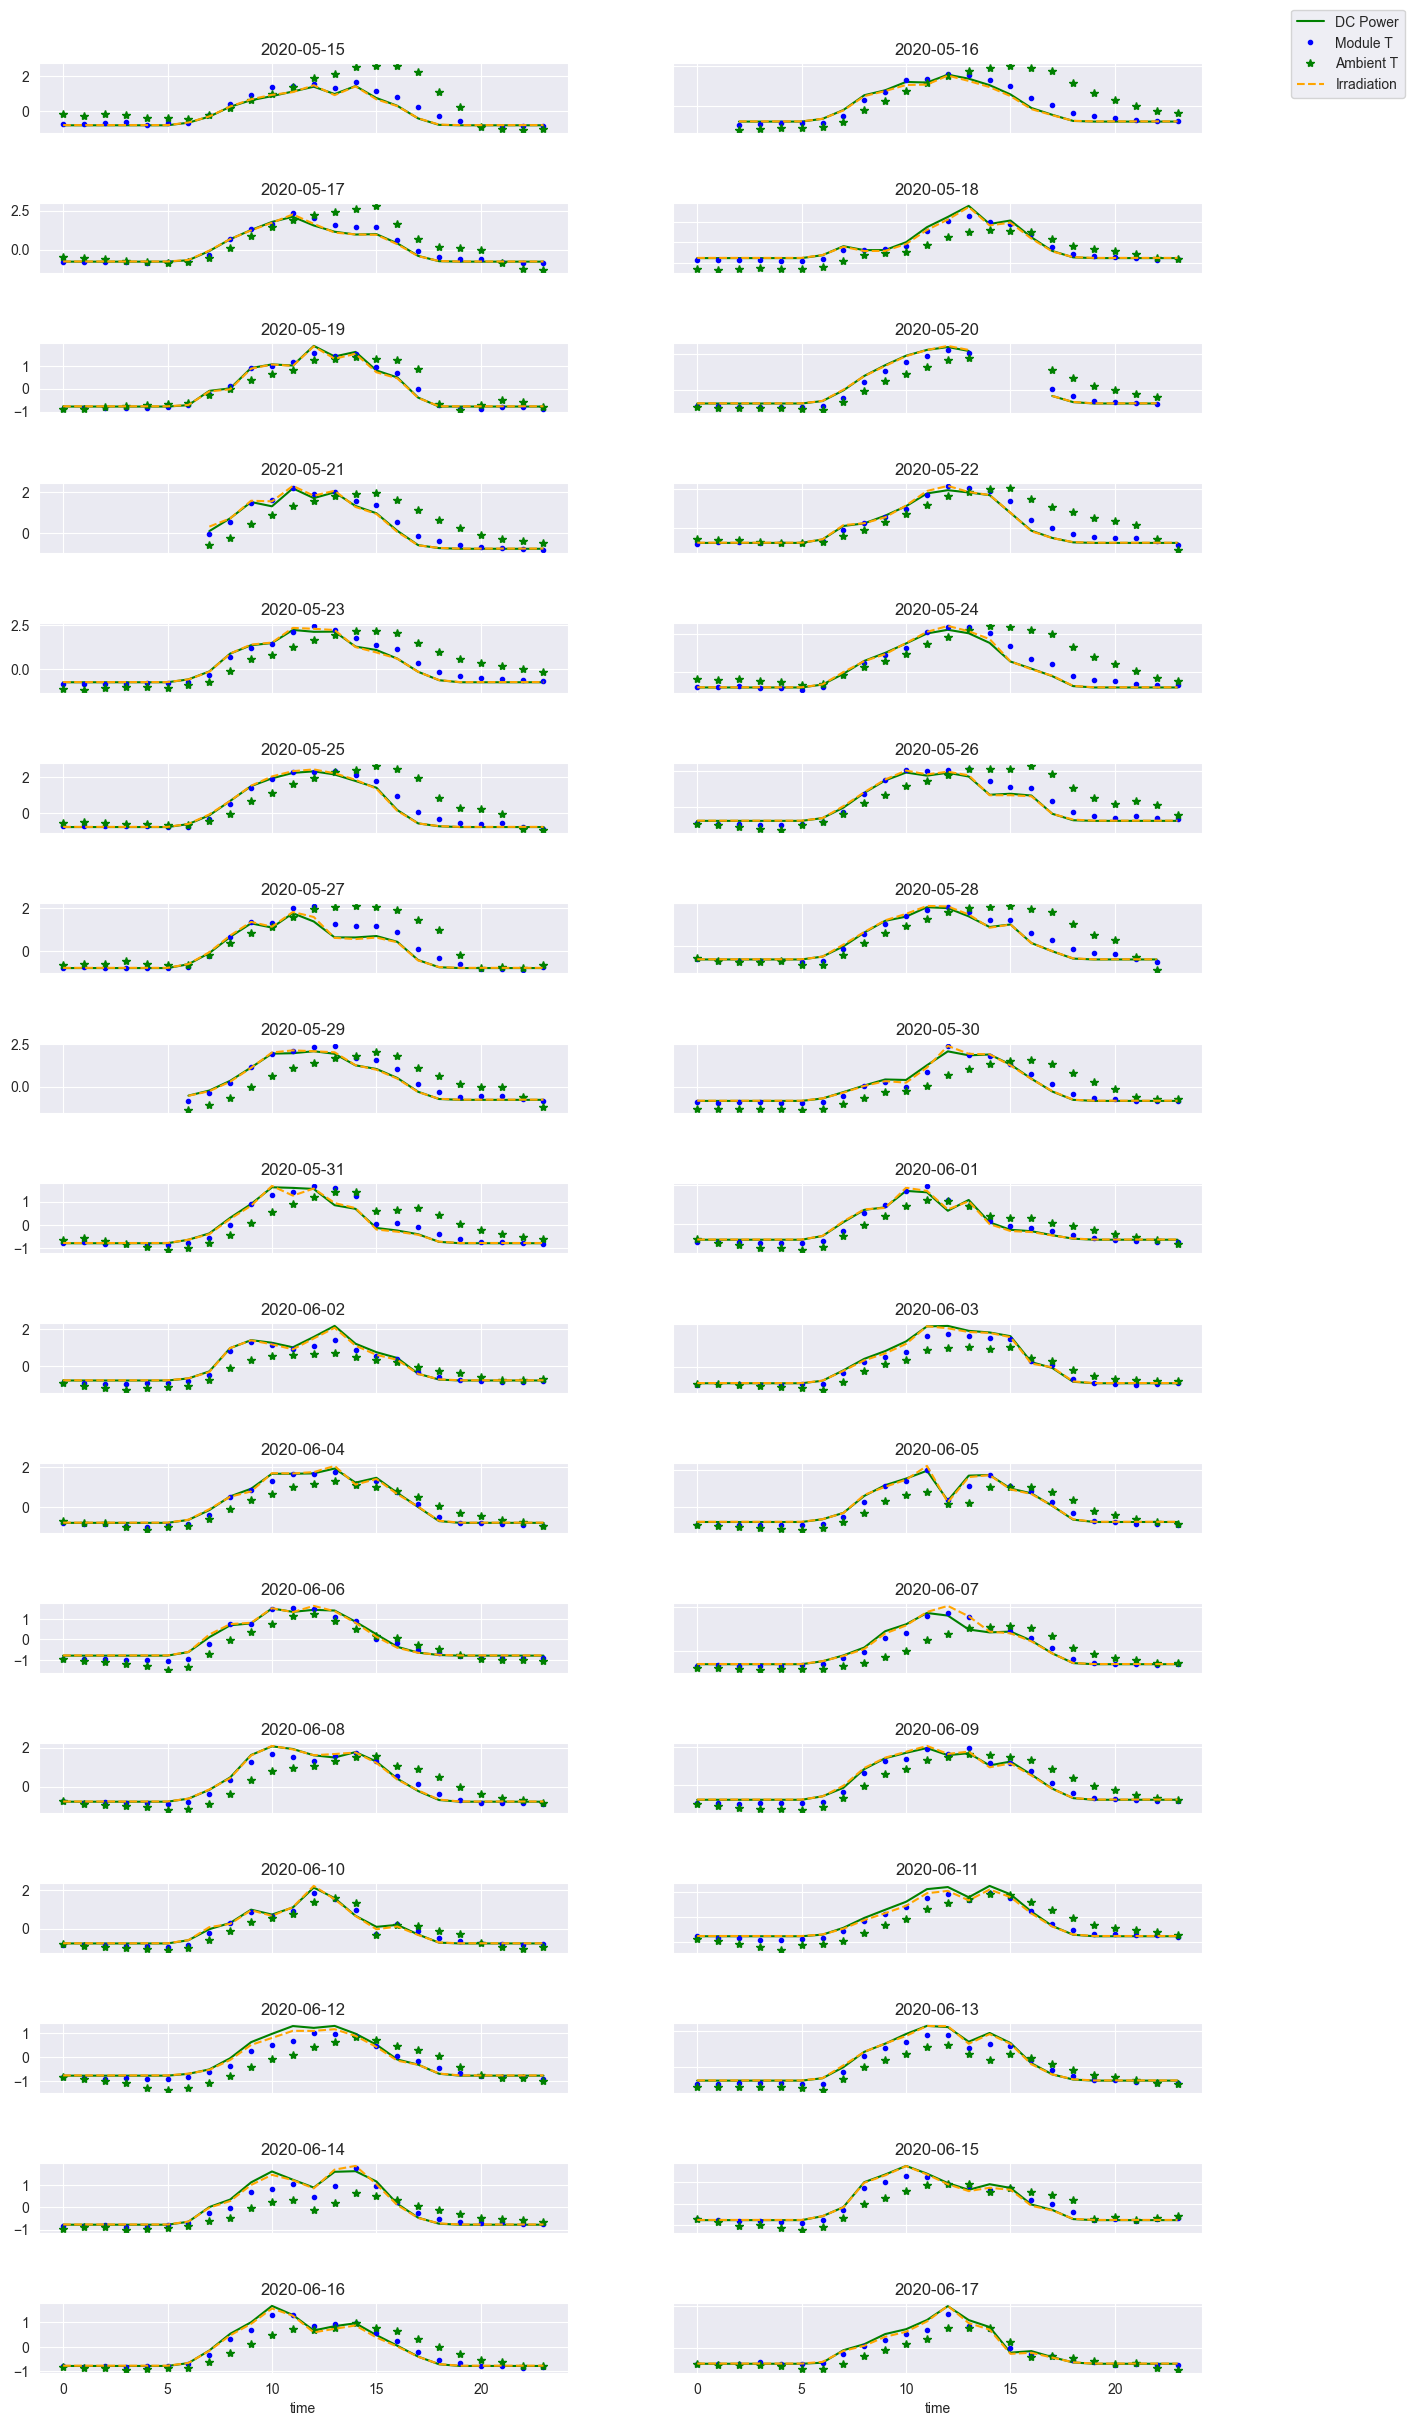

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
col_normalized=['DC_POWER','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','IRRADIATION']
df=gen_sen[col_normalized]
scaler=StandardScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=col_normalized).assign(time=gen_sen.time,Day=gen_sen.Day)

days=df_normalized.Day.unique()
cols1=df_normalized.groupby(['time','Day'])['DC_POWER'].mean().unstack()
cols2=df_normalized.groupby(['time','Day'])['MODULE_TEMPERATURE'].mean().unstack()
cols3=df_normalized.groupby(['time','Day'])['AMBIENT_TEMPERATURE'].mean().unstack()
cols4=df_normalized.groupby(['time','Day'])['IRRADIATION'].mean().unstack()

f, ax = plt.subplots(17, 2, figsize=(15, 30), sharex=True)
f.subplots_adjust(hspace=1)

i = 0
handles,labels=[],[]

for a in range(0, 17):
    for b in range(0, 2):
        ax1 = ax[a, b]
        cols1.plot(sharex=True,sharey=True, y=cols1.columns[i], color='green', ax=ax1, legend=False, label='DC POWER')
        cols2.plot(sharex=True,sharey=True, y=cols2.columns[i], style='b.', ax=ax1, legend=False, label='Module T')
        cols3.plot(sharex=True,sharey=True, y=cols3.columns[i], style='g*', ax=ax1, legend=False, label='Ambient T')
        cols4.plot(sharex=True,sharey=True, y=cols4.columns[i], style='--',color='orange', ax=ax1, legend=False, label='Irradiation')
        ax1.set_title(days[i])
        ax1.set_xlabel('time')
        ax1.set_ylabel('')
        ax1.label_outer()
        i += 1
        
handles, labels=[ax1.lines[0],ax1.lines[1],ax1.lines[2],ax1.lines[3]],['DC Power','Module T','Ambient T','Irradiation']
f.legend(handles,labels,bbox_to_anchor=(1.04,0.90))

TypeError: agg function failed [how->mean,dtype->object]

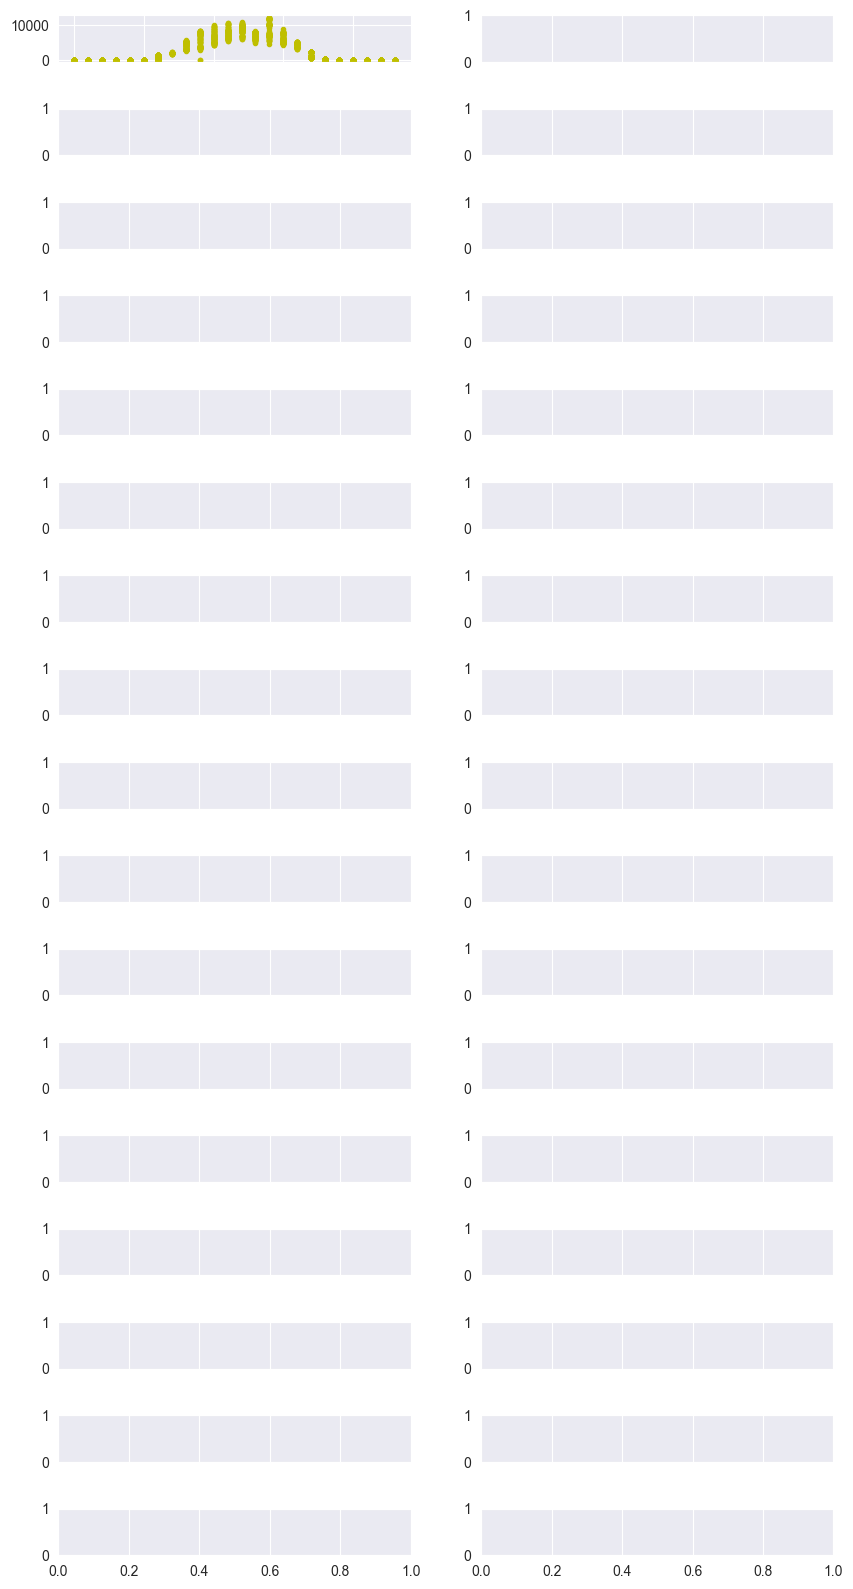

In [41]:
days=gen_sen.Day.unique()
f,ax=plt.subplots(17,2,figsize=(10,20))
f.subplots_adjust(hspace=1)
i=0
for a in range(0,17):
    for b in range(0,2):
        ax1=ax[a,b]
        gen_sen[gen_sen.Day==days[i]].plot(sharex=True,x='time',y='DC_POWER',style='y.',ax=ax1,legend=False)
        gen_sen[gen_sen.Day==days[i]].groupby('time').mean().plot(sharex=True,y='IRRADIATION',color='green',ax=ax1,legend=False,secondary_y=True)
        ax1.set_title(days[i])
        i+=1


handles, labels=[ax1.lines[0],ax1.right_ax.lines[0]],['DC_POWER (Grouped by Inverter)','IRRADIATION']
f.legend(handles,labels,bbox_to_anchor=(1.2,0.90))

TypeError: agg function failed [how->mean,dtype->object]

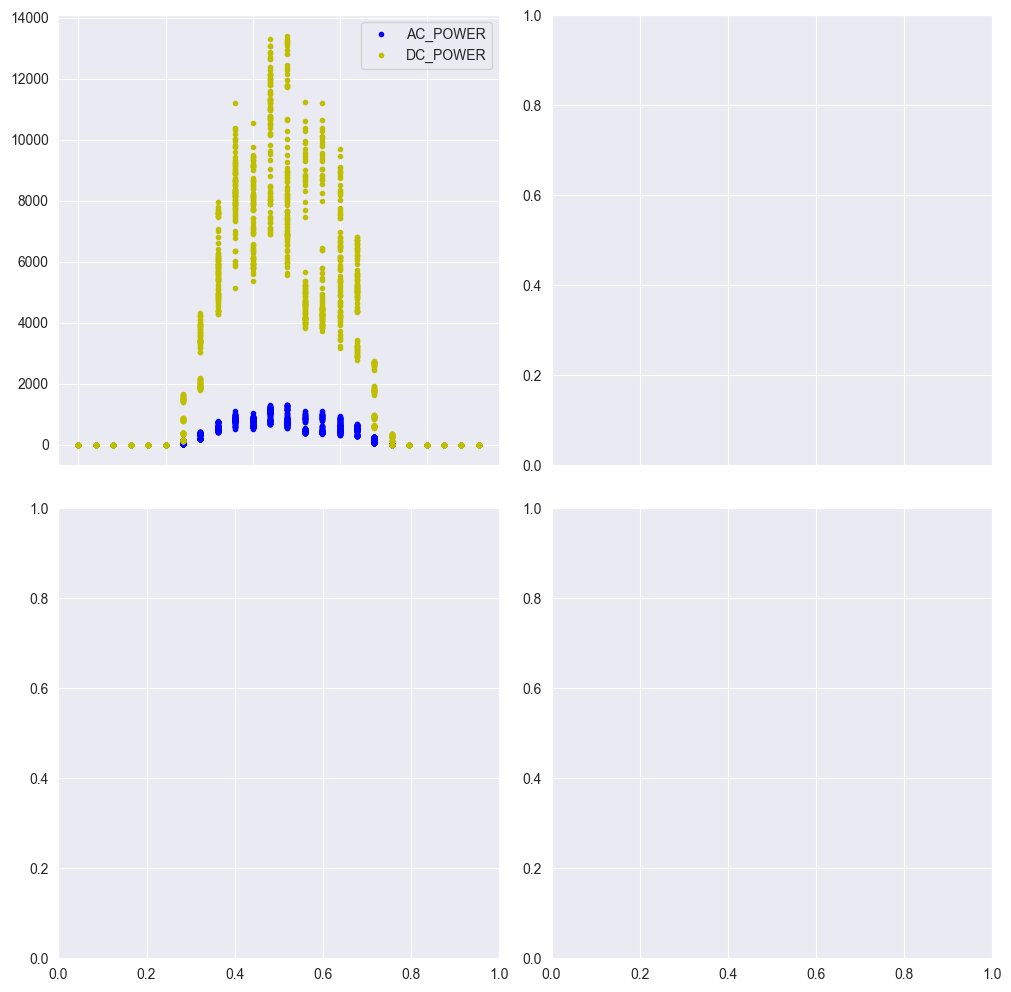

In [42]:
days=['2020-05-27','2020-05-31','2020-06-07','2020-06-14']
f,ax=plt.subplots(2,2,figsize=(10,10))
plt.tight_layout(pad=1)
i=0
for a in range(0,2):
    for b in range(0,2):
        ax1=ax[a,b]
        gen_sen[gen_sen.Day.astype(str)==days[i]].plot(sharex=True,x='time',y='AC_POWER',style='b.',ax=ax1)
        gen_sen[gen_sen.Day.astype(str)==days[i]].plot(sharex=True,x='time',y='DC_POWER',style='y.',ax=ax1)
        gen_sen[gen_sen.Day.astype(str)==days[i]].groupby('time').mean().plot(sharex=True,y='IRRADIATION',color='green',ax=ax1,secondary_y=True)
        ax1.set_title(days[i])
        i+=1

In [45]:
gen_sen['Time_Gap']=gen_sen.DATE_TIME.diff()/ pd.Timedelta(minutes=1)
df_gap=gen_sen[(gen_sen['Time_Gap']!=0) & (gen_sen['Time_Gap']!=15)]
time_gap_start=gen_sen.loc[df_gap.index[1:]-1,'DATE_TIME'].tolist()
time_gap_end=gen_sen.loc[df_gap.index[1:],'DATE_TIME'].tolist()

duration=gen_sen.loc[df_gap.index,'Time_Gap'].tolist()[1:]
total_minutes=gen_sen[(gen_sen['Time_Gap']!=0) & (gen_sen['Time_Gap']!=15)].Time_Gap.sum()

print('Data is missing for the following intervals: \n')
from prettytable import PrettyTable
table = PrettyTable()
table.add_column("Start time", time_gap_start)
table.add_column("End time", time_gap_end)
table.add_column("Duration (minutes)", duration)

print(table)

Data is missing for the following intervals: 

+---------------------+---------------------+--------------------+
|      Start time     |       End time      | Duration (minutes) |
+---------------------+---------------------+--------------------+
| 2020-05-15 23:00:00 | 2020-05-16 02:00:00 |       180.0        |
| 2020-05-19 11:30:00 | 2020-05-19 12:30:00 |        60.0        |
| 2020-05-20 13:15:00 | 2020-05-20 17:30:00 |       255.0        |
| 2020-05-20 22:45:00 | 2020-05-21 07:45:00 |       540.0        |
| 2020-05-23 05:00:00 | 2020-05-23 06:45:00 |       105.0        |
| 2020-05-23 21:30:00 | 2020-05-23 22:00:00 |        30.0        |
| 2020-05-25 05:30:00 | 2020-05-25 06:00:00 |        30.0        |
| 2020-05-28 22:15:00 | 2020-05-29 06:15:00 |       480.0        |
| 2020-06-17 06:00:00 | 2020-06-17 06:45:00 |        45.0        |
+---------------------+---------------------+--------------------+


In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import matplotlib.dates as mdates 

##reading genration dataset
custom_date_parser = lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M') 
gen=pd.read_csv('Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)
gen.head(2)

C:\Users\Umarov.Sh\AppData\Local\Temp\ipykernel_10636\1714479973.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  gen=pd.read_csv('Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0


In [47]:
train=gen['2020-06-13 00:00:00':'2020-06-16 00:00:00'].drop('SOURCE_KEY',axis=1).groupby('DATE_TIME').sum()
test=gen['2020-06-16 00:00:00':'2020-06-16 23:45:00'].drop('SOURCE_KEY',axis=1).groupby('DATE_TIME').sum()

<Axes: xlabel='DATE_TIME', ylabel='DC_POWER'>

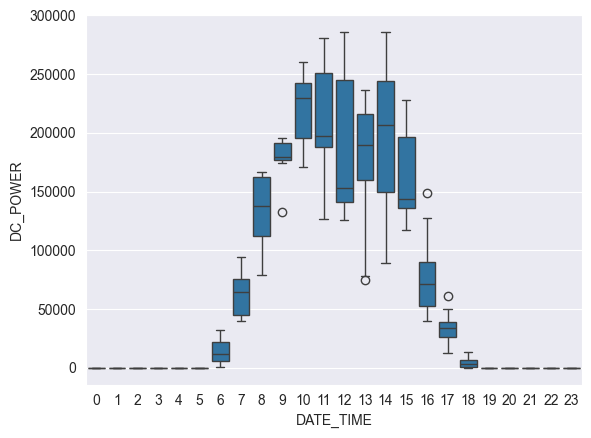

In [48]:
sns.boxplot(x=train.index.hour, y=train.DC_POWER)

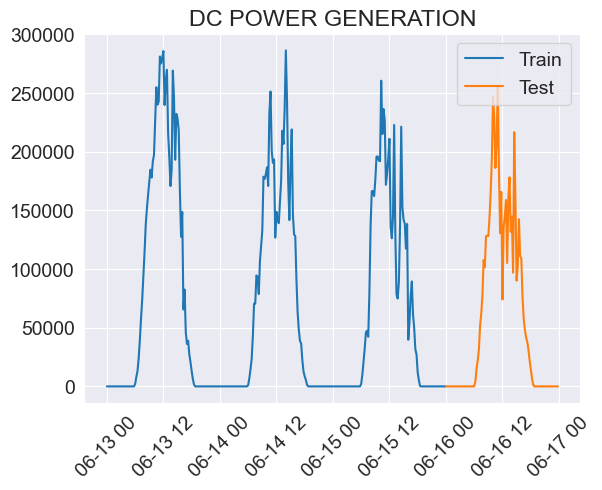

In [74]:
plt.plot(train.DC_POWER, label='Train')
plt.plot(test.DC_POWER,label='Test')
plt.xticks(rotation=45)
plt.title('DC POWER GENERATION')
plt.legend()
plt.show()

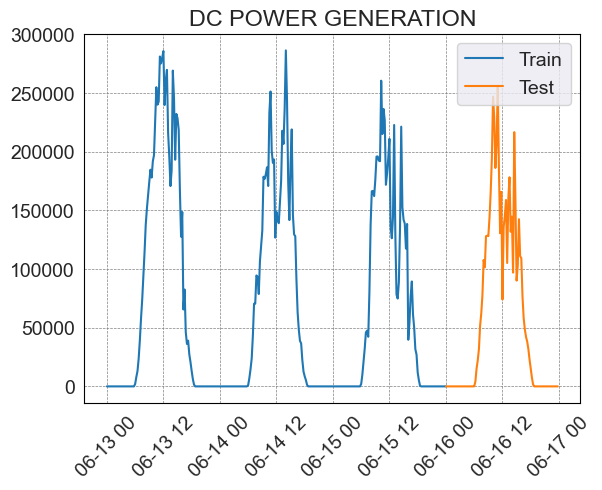

In [78]:
import matplotlib.pyplot as plt

# Set the font to support Cyrillic characters
plt.rcParams["font.family"] = "Arial"

# Plot train and test data
plt.plot(train.DC_POWER, label='Train')
plt.plot(test.DC_POWER, label='Test')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set title
plt.title('DC POWER GENERATION')

# Add legend
plt.legend()

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set black borders around the plot
for spine in plt.gca().spines.values():
    spine.set_color('black')

# Display the plot
plt.show()


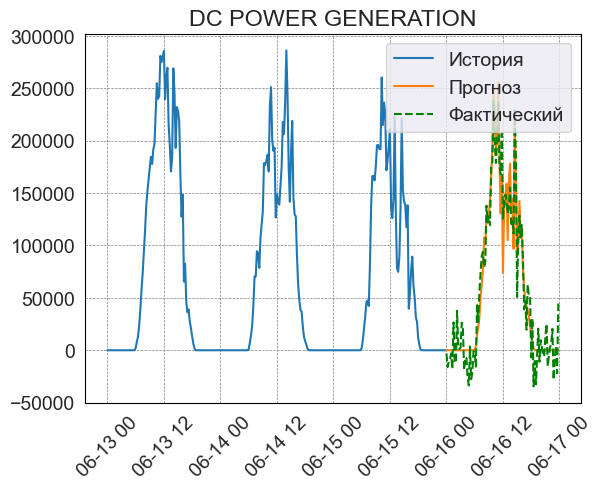

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font to support Cyrillic characters
plt.rcParams["font.family"] = "Arial"

# Plot train and test data
plt.plot(train.DC_POWER, label='История')
plt.plot(test.DC_POWER, label='Прогноз')

# Generate random noise for the result
random_noise = np.random.normal(loc=0, scale=0.3 * np.mean(test.DC_POWER), size=len(test))
result = test.DC_POWER + random_noise

# Plot the result
plt.plot(test.index, result, 'g--', label='Фактический')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set title
plt.title('DC POWER GENERATION')

# Add legend
plt.legend()

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set black borders around the plot
for spine in plt.gca().spines.values():
    spine.set_color('black')

# Display the plot
plt.show()


In [ ]:
https://github.com/sedimir/SediMir/blob/main/machine-learning-forecasting-power-generation.ipynb

In [52]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.DC_POWER)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

ADF Statistic: -3.820570999279646
p-value: 0.002703721620386411
Critical Values:
1%: -3.45453261164607
5%: -2.8721859575020017
10%: -2.572442854861866


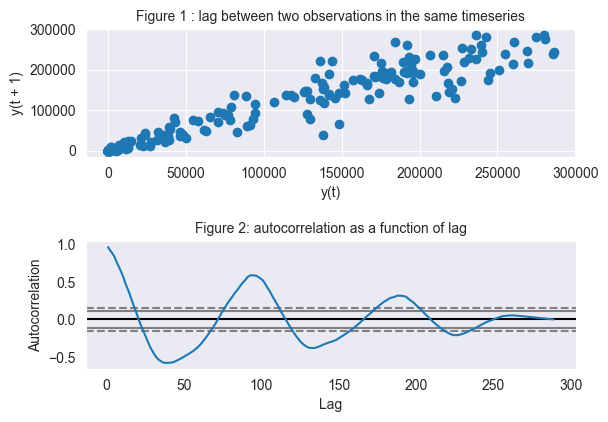

In [53]:
f,ax= plt.subplots(2,1)
plt.tight_layout(pad=4)
pd.plotting.lag_plot(train.DC_POWER, ax=ax[0])
pd.plotting.autocorrelation_plot(train.DC_POWER,ax=ax[1])
ax[0].set_title('Figure 1 : lag between two observations in the same timeseries', fontsize=10)
ax[1].set_title('Figure 2: autocorrelation as a function of lag',fontsize=10)

plt.show()

In [56]:
from prophet import Prophet
train_pr=gen['2020-06-13 00:00:00':'2020-06-16 00:00:00'].drop('SOURCE_KEY',axis=1).DC_POWER.groupby('DATE_TIME').sum().reset_index()
test_pr=gen['2020-06-16 00:00:00':'2020-06-16 23:45:00'].drop('SOURCE_KEY',axis=1).DC_POWER.groupby('DATE_TIME').sum()

train_pr.columns=['ds','y']
model=Prophet()
model.fit(train_pr)

C:\Users\Umarov.Sh\AppData\Local\anaconda3\envs\notebook-_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:34:50 - cmdstanpy - INFO - Chain [1] start processing
15:34:50 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
test_dates=pd.DataFrame(test_pr.index).rename(columns={'DATE_TIME':'ds'})
forecast_prophet=model.predict(test_dates)

dates=pd.date_range(start='2020-06-16 23:45:00',end='2020-06-17 23:45:00',freq=pd.DateOffset(minutes=15))
future_dates=pd.DataFrame(dates,columns=['ds'])
future_prophet=model.predict(future_dates)

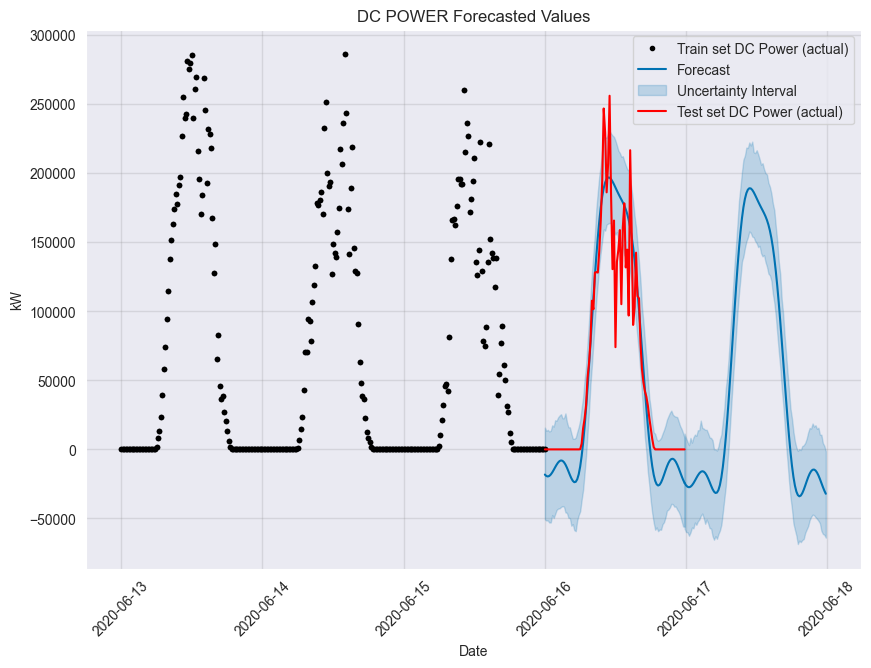

AttributeError: 'numpy.ndarray' object has no attribute 'grid'

In [64]:
plt.figure(figsize=(10,7))
fig1=model.plot(forecast_prophet,ax=plt.gca())
fig1=model.plot(future_prophet,ax=plt.gca())
fig2=plt.plot(test_pr,'r-', label='Actual from test set')

handles1, labels1 = fig1.gca().get_legend_handles_labels()
handles=handles1[0:3]+fig2
labels1 =['Train set DC Power (actual)', 'Forecast', 'Uncertainty Interval','Test set DC Power (actual)']

fig1.gca().legend(handles, labels1,loc='upper right')
plt.xlabel('Date')
plt.ylabel('kW')
plt.title('DC POWER Forecasted Values')
plt.xticks(rotation=45)
plt.show()
ax.grid()
ax.set_xlabel('Время, час')
ax.set_ylabel('Нагрузка, кВт')
ax.legend()
    
plt.show()

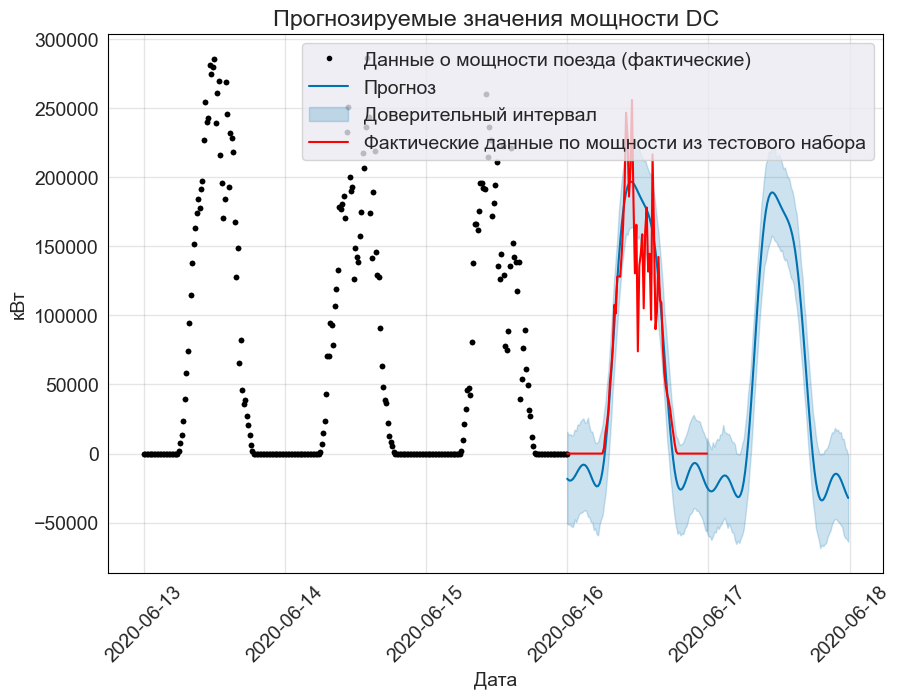

In [73]:
import matplotlib.pyplot as plt

# Set the font to support Cyrillic characters
plt.rcParams["font.family"] = "Arial"

# Create a new figure with a specified size and white background
plt.figure(figsize=(10, 7), facecolor='white')

# Plot forecast and actual data
fig1 = model.plot(forecast_prophet, ax=plt.gca())
fig1 = model.plot(future_prophet, ax=plt.gca())
fig2 = plt.plot(test_pr, 'r-', label='Фактические данные из тестового набора')

# Get legend handles and labels
handles1, labels1 = fig1.gca().get_legend_handles_labels()
handles = handles1[0:3] + fig2
labels1 = ['Данные о мощности поезда (фактические)', 'Прогноз', 'Доверительный интервал', 'Фактические данные по мощности из тестового набора']

# Add legend
fig1.gca().legend(handles, labels1, loc='upper right')

# Set labels and title
plt.xlabel('Дата')
plt.ylabel('кВт')
plt.title('Прогнозируемые значения мощности DC')
plt.xticks(rotation=45)

# Set the background color of the plot area
plt.gca().set_facecolor('white')

# Set black borders around the plot
for spine in plt.gca().spines.values():
    spine.set_color('black')

# Display the plot
plt.show()
